### 线性回归算法介绍

1. 解决回归问题
2. 思想简单，实现容易
3. 许多强大的非线性模型的基础
4. 结果具有很好的解释性
5. 蕴含机器学习中很多重要的思想

### 线性回归代价函数推导

![](http://p9tybni1b.bkt.clouddn.com/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E4%BB%A3%E4%BB%B7%E5%87%BD%E6%95%B0%E6%8E%A8%E5%AF%BC.jpg)

### 实现线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.8 
 b =  0.39999999999999947
[1.2 2.  2.8 3.6 4.4]


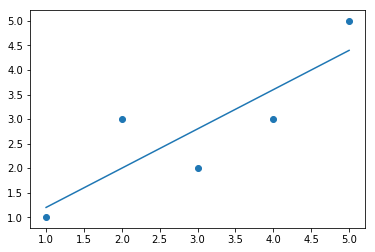

In [7]:
x = np.array([1,2,3,4,5])
y = np.array([1,3,2,3,5])

x_mean = np.mean(x)
y_mean = np.mean(y)

a = np.sum(np.subtract(x,x_mean)*np.subtract(y,y_mean))/np.sum(np.power((x-x_mean),2))
b = y_mean-a*x_mean
y_predict = a*x + b
print("a =",a,"\n","b = ",b)
print(y_predict)
plt.scatter(x,y)
plt.plot(x,y_predict)

### 自己实现线性回归

In [13]:
class SimpleLinearRegression:
    def __init__(self):
        """初始化简单线性模型"""
        self.a_ = None
        self.b_ = None
        
    def fit(self,trainX,trainY):
        """根据数据训练简单线性模型"""
        assert trainX.ndim==1,"SimpleLinearRegression must be input 1D"
        x_mean = np.mean(trainX)
        y_mean = np.mean(trainY)
        self.a_ = np.dot(np.subtract(trainX,x_mean),np.subtract(trainY,y_mean))/np.sum(np.power((trainX-x_mean),2))
        self.b_ = y_mean-self.a_*x_mean
        return self
    
    def _predict(self,test_x):
        """给定单个待测数，返回预测值"""
        test_y = self.a_*test_x + self.b_
        return test_y
    
    def predict(self,testX):
        """给定待测数据集，返回结果向量"""
        return np.array([self._predict(i) for i in testX])

In [14]:
simpleLinearRegression = SimpleLinearRegression()
simpleLinearRegression.fit(x,y)
print(simpleLinearRegression.a_)
print(simpleLinearRegression.b_)
simpleLinearRegression.predict(x)

0.8
0.39999999999999947


array([1.2, 2. , 2.8, 3.6, 4.4])

### 衡量线性回归的指标

均方误差MSE
![均方误差MSE](http://p9tybni1b.bkt.clouddn.com/%E5%9D%87%E6%96%B9%E8%AF%AF%E5%B7%AE.png)

均方根误差RMSE
![均方根误差RMSE](http://p9tybni1b.bkt.clouddn.com/%E5%9D%87%E6%96%B9%E6%A0%B9%E8%AF%AF%E5%B7%AE.png)

平均绝对误差MAE
![平均绝对误差MAE](http://p9tybni1b.bkt.clouddn.com/%E5%B9%B3%E5%9D%87%E7%BB%9D%E5%AF%B9%E8%AF%AF%E5%B7%AE.png)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [9]:
boston = datasets.load_boston()

In [11]:
x = boston.data[:,5] # 只使用房间数量这特征
y = boston.target
x = x[y<50]
y = y[y<50]

(0, 60)

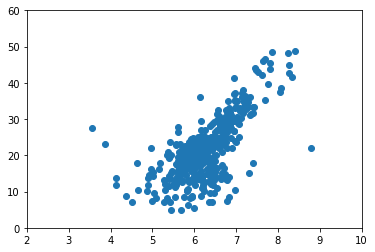

In [39]:
plt.scatter(x,y)
plt.xlim(2,10)
plt.ylim(0,60)

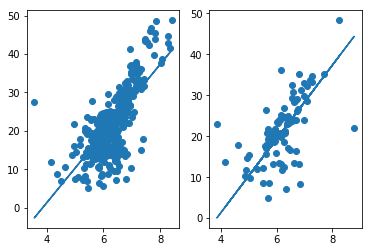

In [47]:
trainX,testX,trainY,testY = train_test_split(x,y,test_size=0.2)
simpleLinearRegression = SimpleLinearRegression()
simpleLinearRegression.fit(trainX,trainY)
train_y = simpleLinearRegression.predict(trainX)
test_y = simpleLinearRegression.predict(testX)

plt.subplot(1,2,1)
plt.scatter(trainX,trainY)
plt.plot(trainX,train_y)

plt.subplot(1,2,2)
plt.scatter(testX,testY)
plt.plot(testX,test_y)

### MSE

In [51]:
mse = np.sum(np.power(np.subtract(test_y,testY),2))/test_y.shape[0]
mse

40.95154236464736

### RMSE

In [53]:
rmse = np.sqrt(mse)
rmse

6.39933921312563

### MAE

In [55]:
mae = np.sum(np.abs(test_y-testY))/test_y.shape[0]
mae

4.399066068730565

## R Squared

![](http://p9tybni1b.bkt.clouddn.com/R%20Squared.png)

In [63]:
r = 1-mse/np.var(testY)
r

0.2541624531120106

In [65]:
from sklearn.metrics import r2_score


r2_score(testY,test_y)

0.2541624531120107

## 多元线性回归

优点:不需要对数据做归一化处理<br>
缺点：时间复杂度高

![正规方程](http://p9tybni1b.bkt.clouddn.com/%E6%AD%A3%E8%A7%84%E6%96%B9%E7%A8%8B%E8%A7%A3.jpg)

### 自己实现正规方程法LinearRegressor

In [114]:
from sklearn.metrics import r2_score

class LinearRegressor:
    def __init__(self):
        self.coef_ = None # θ向量
        self.intercept_ = None # 截距
        self._theta = None
        
    def fit(self,trainX,trainY):
        x = np.hstack((np.ones((trainX.shape[0],1)),trainX))
        self._theta = np.linalg.inv(np.dot(x.T,x)).dot(x.T).dot(trainY)
        self.intercept_ = self._theta[0] # 截距
        self.coef_ = self._theta[1:] # 权重参数weights
        return self
    
    def predict(self,testX):
        x = np.hstack((np.ones((testX.shape[0],1)),testX))
        y = np.dot(x,self._theta.reshape(-1,1))
#         y = np.dot(x,self._theta)
        return y
    
    def score(self,testX,testY):
        return r2_score(testY,self.predict(testX))

In [115]:
trainX,testX,trainY,testY = train_test_split(x,y,test_size=0.2,random_state=666)
lin_reg = LinearRegressor()
lin_reg.fit(trainX,trainY)
print(lin_reg.predict(testX).shape)
print(lin_reg.coef_)
print(lin_reg.intercept_)
print(lin_reg.score(testX,testY))

(98, 1)
[-1.18919477e-01  3.63991462e-02 -3.56494193e-02  5.66737830e-02
 -1.16195486e+01  3.42022185e+00 -2.31470282e-02 -1.19509560e+00
  2.59339091e-01 -1.40112724e-02 -8.36521175e-01  7.92283639e-03
 -3.81966137e-01]
34.16143549624022
0.8129802602658537


### 实现多元线性回归模型

In [12]:
boston = datasets.load_boston()
x = boston.data
y = boston.target
x = x[y<50]
y = y[y<50]
x.shape

(490, 13)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


trainX,testX,trainY,testY = train_test_split(x,y,test_size=0.2,random_state=666)
lin_reg = LinearRegression()
lin_reg.fit(trainX,trainY)
print(lin_reg.predict(testX).shape)
print(lin_reg.coef_)
print(lin_reg.intercept_)
print(lin_reg.score(testX,testY))

(98,)
[-1.18919477e-01  3.63991462e-02 -3.56494193e-02  5.66737830e-02
 -1.16195486e+01  3.42022185e+00 -2.31470282e-02 -1.19509560e+00
  2.59339091e-01 -1.40112724e-02 -8.36521175e-01  7.92283639e-03
 -3.81966137e-01]
34.16143549624665
0.8129802602658495


### KNN Regressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


kneighborsRegressor = KNeighborsRegressor()
kneighborsRegressor.fit(trainX,trainY)
print(kneighborsRegressor.score(trainX,trainY))
y_predict = kneighborsRegressor.predict(testX)
r2_score(testY,y_predict)

0.7171226604429326


0.5865412198300899

In [26]:
from sklearn.model_selection import GridSearchCV


param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }
]

knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg,param_grid,n_jobs=-1,verbose=1)
grid_search.fit(trainX,trainY)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [29]:
print(grid_search.best_score_)
print(grid_search.best_estimator_.score(testX,testY))

0.634093080186858
0.7044357727037996


## 更多关于线性回归模型的讨论

1. 对数据具有强解释性，正负相关影响因素大小，从而使我们有目标性的采集数据
2. 对数据有假设：线性
3. 对数据进行多元线性回归试探关系，总归是没有坏处的